In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

state_data = pd.read_csv('Datathon Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv')
stock_data = pd.read_csv('Datathon Data/all_stock_and_etfs.csv')
state_data['Label (Grouping)'] = state_data['Label (Grouping)'].str.strip() # It had strange tabs in front




In [48]:


output_dir = 'Adel-states-socioeconomic'
os.makedirs(output_dir, exist_ok=True)

for state in state_data['State'].unique():
    state_subset = state_data[state_data['State'] == state]
    state_subset.to_csv(f'{output_dir}/state_data_{state}.csv', index=False)

print("State-specific CSV files have been created.")

State-specific CSV files have been created.


In [49]:

stock_data['Date-Time'] = pd.to_datetime(stock_data['Date-Time'])
stock_data['Year'] = stock_data['Date-Time'].dt.year

input_dir = 'Adel-states-socioeconomic'

correlations = []

for state_file in os.listdir(input_dir):
    if state_file.endswith('.csv'):
        state_name = state_file.split('_')[-1].split('.')[0]
        state_data = pd.read_csv(f'{input_dir}/{state_file}')
        
        state_data['Label (Grouping)'] = state_data['Label (Grouping)'].str.strip()
        
        state_unemployment = state_data[state_data['Label (Grouping)'] == 'Less than $10,000'][['Year', 'Percent']]
        
        state_unemployment['Year'] = pd.to_datetime(state_unemployment['Year'], format='%Y').dt.year
        
        state_unemployment['Percent'] = state_unemployment['Percent'].str.rstrip('%').astype(float)
        
        merged_data = pd.merge(state_unemployment, stock_data, on='Year')
        
        if not merged_data.empty:
            correlation = merged_data['Percent'].corr(merged_data['Open'])
            correlations.append({'State': state_name, 'Correlation': correlation})
        
        print(f"Correlation for {state_name}: {correlation}")

correlations_df = pd.DataFrame(correlations)

correlations_df = correlations_df.sort_values(by='Correlation', ascending=False)

print(correlations_df)


Correlation for Ohio: -0.15364803597696572
Correlation for Alabama: -0.15417661586172093
Correlation for Arizona: -0.1756683016895166
Correlation for Kentucky: -0.1578945418420612
Correlation for Delaware: -0.08418736185044615
Correlation for District of Columbia: -0.1927213264036732
Correlation for Connecticut: -0.08634949595555913
Correlation for Texas: -0.1669153562021392
Correlation for Vermont: -0.13428752552037282
Correlation for Missouri: -0.1551593475339711
Correlation for North Dakota: -0.11937536791253475
Correlation for New Hampshire: -0.11799408143697632
Correlation for Illinois: -0.10659297390384792
Correlation for Colorado: -0.16399653023696664
Correlation for Rhode Island: -0.14448450726583112
Correlation for Louisiana: -0.09868227382460792
Correlation for Oklahoma: -0.14625439236150006
Correlation for South Carolina: -0.1626927821488776
Correlation for Virginia: -0.11051210409943812
Correlation for New York: -0.13893318426235587
Correlation for Hawaii: -0.08945945832414

In [50]:


all_correlations = {}

ticker_symbols = stock_data['Ticker_Symbol'].unique()

for ticker in ticker_symbols:
    stock_data_ticker = stock_data[stock_data['Ticker_Symbol'] == ticker]
    
    correlations = []

    # Iterate through each state file
    for state_file in os.listdir(input_dir):
        if state_file.endswith('.csv'):
            state_name = state_file.split('_')[-1].split('.')[0]
            state_data = pd.read_csv(f'{input_dir}/{state_file}')
                        
            state_unemployment = state_data[state_data['Label (Grouping)'] == 'Less than $10,000'][['Year', 'Percent']]
            
            state_unemployment['Year'] = pd.to_datetime(state_unemployment['Year'], format='%Y').dt.year
            
            state_unemployment['Percent'] = state_unemployment['Percent'].str.rstrip('%').astype(float)
            
            # Merge the datasets on the common time field (Year)
            merged_data = pd.merge(state_unemployment, stock_data_ticker, on='Year')
            
            if not merged_data.empty:
                correlation = merged_data['Percent'].corr(merged_data['Open'])
                correlations.append({'State': state_name, 'Correlation': correlation})
                
                print(f"Correlation for {state_name} ({ticker}): {correlation}")

    correlations_df = pd.DataFrame(correlations)

    correlations_df = correlations_df.sort_values(by='Correlation', ascending=False)

    all_correlations[ticker] = correlations_df

# Print all sorted correlations for each stock
for ticker, df in all_correlations.items():
    print(f"\nCorrelations for {ticker}:")
    print(df)

Correlation for Ohio (HRL): -0.0911079935874222
Correlation for Alabama (HRL): -0.08533270845587532
Correlation for Arizona (HRL): -0.07411276694460738
Correlation for Kentucky (HRL): -0.12063944909055277
Correlation for Delaware (HRL): -0.019842479275599997
Correlation for District of Columbia (HRL): -0.12957577426667374
Correlation for Connecticut (HRL): -0.012550144740063104
Correlation for Texas (HRL): -0.10876009903968178
Correlation for Vermont (HRL): -0.0930965115839017
Correlation for Missouri (HRL): -0.07924138606392901
Correlation for North Dakota (HRL): -0.11406091377709764
Correlation for New Hampshire (HRL): -0.08427440973708161
Correlation for Illinois (HRL): -0.04348372782612849
Correlation for Colorado (HRL): -0.12357181628909855
Correlation for Rhode Island (HRL): -0.07203147608520585
Correlation for Louisiana (HRL): -0.04534331480732983
Correlation for Oklahoma (HRL): -0.09435423902456988
Correlation for South Carolina (HRL): -0.10927653568461108
Correlation for Virgi

In [54]:
average_correlations = {}

for ticker, df in all_correlations.items():
    average_correlation = df['Correlation'].mean()
    average_correlations[ticker] = average_correlation

average_correlations_df = pd.DataFrame(list(average_correlations.items()), columns=['Ticker', 'Average Correlation'])
average_correlations_df = average_correlations_df.sort_values(by='Average Correlation', ascending=True)

print("Ticker symbols with the most effect on all states for households income less than 10 000:")
print(average_correlations_df)

Ticker symbols with the most effect on all states for households income less than 10 000:
   Ticker  Average Correlation
25    MCD            -0.416713
4     DIA            -0.401623
27    DPZ            -0.401192
18    SPY            -0.401041
5     PEP            -0.400353
19     DE            -0.399296
16   COKE            -0.398393
12    HSY            -0.391560
28    ALG            -0.391428
11    DRI            -0.390311
13    CAT            -0.387242
1     VOO            -0.387014
22    WEN            -0.386372
3    AGCO            -0.370084
15    CMG            -0.363564
23    YUM            -0.361544
7    TSCO            -0.351918
20    TSN            -0.335149
2     ADM            -0.334451
26    SAP            -0.329123
24    VMI            -0.324685
14   SBUX            -0.294493
17   CNHI            -0.269992
6     QSR            -0.253471
21    GIS            -0.232919
9     PPC            -0.206854
8    ONEQ            -0.077238
0     HRL            -0.076627
10    CAG  

In [33]:
texas_unemployment.head(10)

,Year,Percent
9,2010,7.0
154,2011,7.3
299,2013,8.1
444,2012,7.7
1024,2014,7.7


In [34]:
merged_data.head()

,Year,Percent,Date-Time,Open,High,Low,Close,Volume,Ticker_Symbol
0,2010,7.0,2010-12-31,51.20,51.50,51.018,51.26,388200,HRL
1,2010,7.0,2010-12-30,51.63,51.76,51.200,51.23,446100,HRL
2,2010,7.0,2010-12-29,51.72,51.88,51.480,51.63,374100,HRL
3,2010,7.0,2010-12-28,51.51,51.68,51.300,51.67,332000,HRL
4,2010,7.0,2010-12-27,51.58,51.73,51.290,51.52,248800,HRL


Correlation Matrix:
          Percent      Open
Percent  1.000000  0.167909
Open     0.167909  1.000000


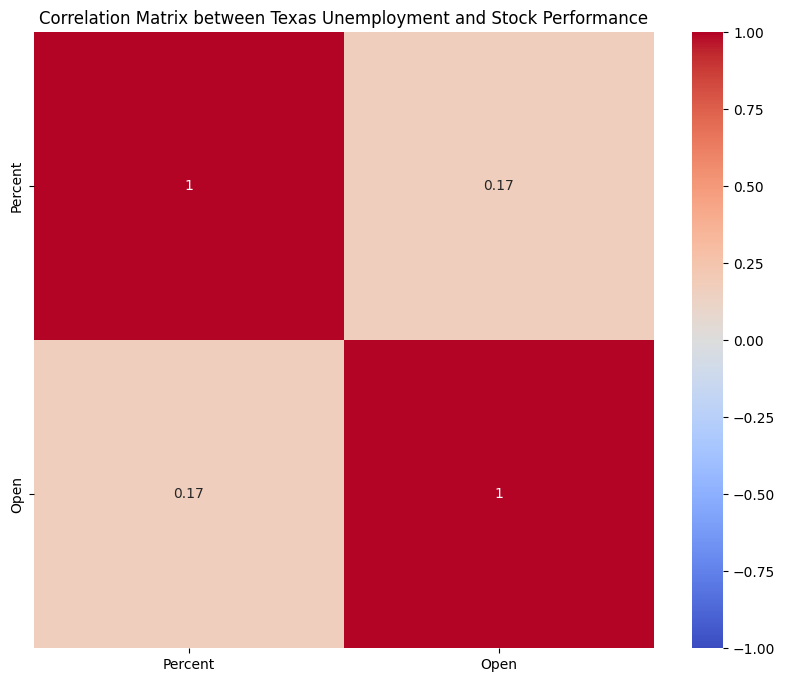

In [35]:
# Perform correlation analysis
correlation_matrix = merged_data[['Percent', 'Open']].corr()

# Print correlation results
print("Correlation Matrix:")
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Texas Unemployment and Stock Performance')
plt.show()

In [5]:
state_data.head()


,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
0,EMPLOYMENT STATUS,Header,Alabama,NaN,NaN,NaN,NaN,2010
1,Population 16 years and over,EMPLOYMENT STATUS,Alabama,"3,714,504","±1,588","3,714,504",(X),2010
2,In labor force,EMPLOYMENT STATUS,Alabama,"2,246,848","±5,576",60.5%,±0.1,2010
3,Civilian labor force,EMPLOYMENT STATUS,Alabama,"2,230,879","±5,531",60.1%,±0.1,2010
4,Employed,EMPLOYMENT STATUS,Alabama,"2,036,867","±5,904",54.8%,±0.2,2010


In [6]:
stock_data.head()

,Date-Time,Open,High,Low,Close,Volume,Ticker_Symbol
0,2024-02-20,29.09,29.7100,29.0001,29.44,2673889,HRL
1,2024-02-16,29.01,29.1700,28.7650,28.99,5655091,HRL
2,2024-02-15,28.94,29.2210,28.8500,29.11,2380372,HRL
3,2024-02-14,28.76,28.8254,28.5100,28.80,2690379,HRL
4,2024-02-13,29.56,29.8000,28.6350,28.72,4173650,HRL


In [ ]:
state_data['Year'] = pd.to_datetime(state_data['YearStart'], format='%Y')
stock_data['Date-Time'] = pd.to_datetime(stock_data['Date-Time'])

merged_data = pd.merge(state_data, stock_data, left_on='Year', right_on='Date-Time')

relevant_columns = ['Data_Value', 'Open', 'High', 'Low', 'Close', 'Volume']
correlation_matrix = merged_data[relevant_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Stock Values and State Metrics')
plt.show()

In [ ]:

state_metrics = ['Data_Value']  
stock_metrics = ['Open', 'High', 'Low', 'Close', 'Volume']

results = []

for state in merged_data['LocationDesc'].unique():
    state_subset = merged_data[merged_data['LocationDesc'] == state]
    for stock in stock_data['Ticker_Symbol'].unique():
        stock_subset = state_subset[state_subset['Ticker_Symbol'] == stock]
        if not stock_subset.empty:
            for state_metric in state_metrics:
                for stock_metric in stock_metrics:
                    corr = stock_subset[state_metric].corr(stock_subset[stock_metric])
                    results.append({
                        'State': state,
                        'Stock': stock,
                        'State Metric': state_metric,
                        'Stock Metric': stock_metric,
                        'Correlation': corr
                    })

results_df = pd.DataFrame(results)

results_df.to_csv('Adel-data/stock_state_correlation_results.csv', index=False)

for state in merged_data['LocationDesc'].unique()[:3]:  
    for stock in stock_data['Ticker_Symbol'].unique()[:3]: 
        state_subset = merged_data[merged_data['LocationDesc'] == state]
        stock_subset = state_subset[state_subset['Ticker_Symbol'] == stock]
        if not stock_subset.empty:
            plt.figure(figsize=(12, 6))
            for state_metric in state_metrics:
                for stock_metric in stock_metrics:
                    plt.plot(stock_subset['Date-Time'], stock_subset[state_metric], label=f'{state_metric}')
                    plt.plot(stock_subset['Date-Time'], stock_subset[stock_metric], label=f'{stock_metric}')
            plt.title(f'Time Series Plot for {state} and {stock}')
            plt.legend()
            plt.show()
